In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lp_interior(lw,r,abs_eq,q=1):
    abs_eq = np.array(abs_eq)
    for i in range(len(abs_eq)):
        return lw + 10*np.log10((q/(4*np.pi*r**2))+4/abs_eq[i])

In [3]:
def area_abs_eq(alpha,area):
    alpha = np.array(alpha)
    return alpha*area

In [24]:
LW = 100
SOURCE_POSITIONS = {'F1':(289782,6363955),
                    'F2':(289788,6363955),
                    'F3':(289782,6363979)}
Wall_N = (0.9,0.9,0.9,0.9,0.9,0.9)
Wall_reflect = (0.01,0.01,0.01,0.01,0.01,0.01)
SURFACE = 1900

In [25]:
x_list = np.linspace(289772, 289792, 200)
y_list = np.linspace(6363952, 6363982, 300)
X, Y = np.meshgrid(x_list, y_list)

In [26]:
def distance_2d(x_point, y_point, x, y):
    return np.hypot(x-x_point, y-y_point)

In [27]:
lp_sources = {key:None for key in SOURCE_POSITIONS}

In [28]:
for source, positions in SOURCE_POSITIONS.items():
    lp_sources[source] = lp_interior(LW, distance_2d(positions[0], positions[1], X, Y), area_abs_eq(Wall_N, SURFACE))

In [29]:
lp_values = np.array([value for value in lp_sources.values()])

In [30]:
def sum_matrix(matrix):
    result = np.zeros_like(matrix[0])
    for matrix in matrix:
        result+=matrix
    return result

In [31]:
lp_total = 10*np.log10(sum_matrix(10**(lp_values/10)))

C:\Users\richa\AppData\Local\Temp\ipykernel_50784\1265138792.py:3: UserWarning: The following kwargs were not used by contour: 'interpolation'
  plt.contourf(lp_total, origin='lower', interpolation="none")


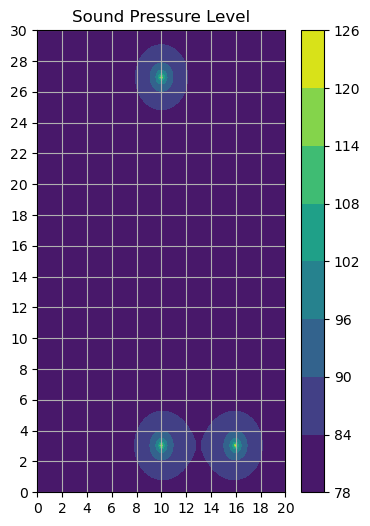

In [39]:
plt.figure(figsize=(4,6))
plt.title('Sound Pressure Level')
plt.contourf(lp_total, origin='lower', interpolation="none")
plt.xticks(np.arange(0, 220, 20),np.arange(0, 22, 2))  # need to set the ticks manually
plt.yticks(np.arange(0, 320, 20),np.arange(0, 32, 2))
plt.colorbar()
plt.grid(True)